In [1]:
import warnings
warnings.filterwarnings("ignore")
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.ensemble import RandomForestClassifier

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV

In [2]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\breast-cancer-wisconsin.csv"

In [3]:
names = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 

dx = ['Benign', 'Malignant']

In [4]:
# load the training data from breast cancer data set
breast_cancer = pd.read_csv(location, names=names)

In [5]:
breast_cancer.shape

(569, 32)

In [6]:
# examine the structure of data
breast_cancer.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Cleaning

minor cleaning, 
- such as setting the id_number to the data frame index and 
- converting the diagnosis to the standard binary 1, 0 representation using the map() function.

In [7]:
# Setting 'id_number' as our index
breast_cancer.set_index(['id_number'], inplace = True)

# Converted to binary to help later on with models and plots
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1, 'B':0})

#### Missing Values

In [8]:
breast_cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
for col in breast_cancer:
    if ((breast_cancer[col].isnull().values.ravel().sum()) == 0):
        pass
    else:
        print(col)
        print((breast_cancer[col].isnull().values.ravel().sum()))
        
print('Sanity Check! No missing Values found!')

Sanity Check! No missing Values found!


In [10]:
# For later use in CART models
names_index = names[2:]

In [11]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id_number,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
print("Here's the dimensions of our data frame:\n",   breast_cancer.shape)
print("Here's the data types of our columns:\n",      breast_cancer.dtypes)

Here's the dimensions of our data frame:
 (569, 31)
Here's the data types of our columns:
 diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64

#### Class Imbalance

The distribution of diagnoses is important because it speaks to class imbalance within machine learning and data mining applications. Class imbalance is a term used to describe when a target class within a data set is outnumbered by another target class (or classes). This can create misleading accuracy metrics, known as an accuracy paradox.

In [14]:
def print_dx_perc(data_frame, col):
    """Function used to print class distribution for our data set"""
    
    dx_vals = data_frame[col].value_counts()
    dx_vals = dx_vals.reset_index()
    
    # Create a function to output the percentage
    f = lambda x, y: 100 * (x / sum(y))
    for i in range(0, len(dx)):
        print('{0} accounts for {1:.2f}% of the diagnosis class'\
          .format(dx[i], f(dx_vals[col].iloc[i],
                           dx_vals[col])))

In [15]:
print_dx_perc(breast_cancer, 'diagnosis')

Benign accounts for 62.74% of the diagnosis class
Malignant accounts for 37.26% of the diagnosis class


In [16]:
# the above can be achieved by following 1 liner
breast_cancer.diagnosis.value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

Benign results account for 62.74% of the diagnosis class. Malignant results account for 37.26% of the diagnosis class. Fortunately, this data set __does not__ suffer from class imbalance.

In [17]:
breast_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


__Standardization__ is an important requirement for many classification models that should be handled when implementing pre-processing. 

Some models (like neural networks) can perform poorly if pre-processing isn't considered, so the describe() function is a good indicator for standardization. 

Fortunately, random forest does not require any pre-processing.

#### Creating Training and Test Sets

In [18]:
feature_space = breast_cancer.iloc[:, breast_cancer.columns != 'diagnosis']
feature_class = breast_cancer.iloc[:, breast_cancer.columns == 'diagnosis']

In [19]:
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20,
                                                                    random_state = 42)

In [20]:
# Cleaning test sets to avoid future warning messages
class_set      = class_set.values.ravel()
test_class_set = test_class_set.values.ravel()

#### Fitting Random Forest

- max_depth: The maximum splits for all trees in the forest.
- bootstrap: An indicator of whether or not we want to use bootstrap samples when building trees.
- max_features: The maximum number of features that will be used in node splitting — the main difference I previously mentioned between bagging trees and random forest. Typically, you want a value that is less than p, where p is all features in your data set.
- criterion: This is the metric used to asses the stopping criteria for the decision trees.

In [44]:
# Set the random state for reproductibility
fit_rf = RandomForestClassifier(random_state=42)

#### Hyperparameter Optimization

In [45]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(estimator=fit_rf, 
                     cv = 3,
                     param_grid=param_dist,
                     n_jobs = -1, verbose =3)

cv_rf.fit(training_set, class_set)


end = time.time()


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.2s finished


In [46]:
print('Best Parameters using grid search: \n',  cv_rf.best_params_)
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}
Time taken in grid search:  10.46


In [47]:
# Set best parameters given by grid search
fit_rf.set_params(criterion    = 'gini',
                  max_features = 'log2',
                  max_depth    = 4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Out-of-Bag Error Rate

Another useful feature of random forest is the concept of an out-of-bag (OOB) error rate. 

- only two-thirds of the data are used to train each tree when building the forest, 
- one-third of unseen data can be used in a way that is advantageous to our accuracy metrics without being as computationally expensive as something like cross validation, for instance.

In [48]:
fit_rf.set_params(warm_start=True, oob_score=True)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=True)

In [49]:
min_estimators = 10
max_estimators = 600

In [50]:
error_rate = {}

In [51]:
for i in range(min_estimators, max_estimators + 1, 5):
    
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    # oob error rate
    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [53]:
# error_rate

In [54]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

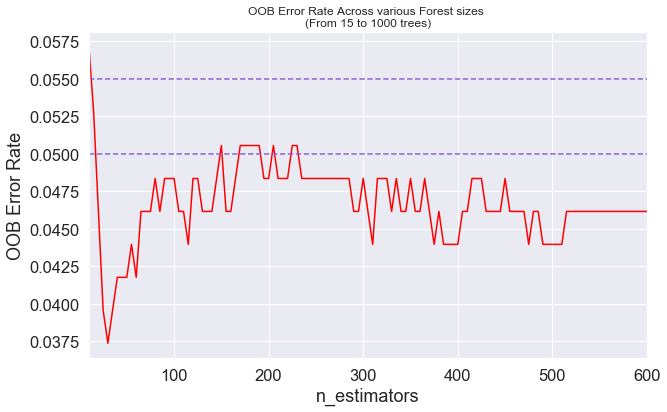

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

#ax.set_axis_bgcolor('#fafafa')

oob_series.plot(kind='line', color = 'red')

plt.axhline(0.055, color='#875FDB', linestyle='--')
plt.axhline(0.05,  color='#875FDB', linestyle='--')

plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)', fontsize=12);

The OOB error rate starts to oscillate at around 400 trees, we can use 400 trees in forest.

In [56]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.04396


Utilizing the OOB error rate that was created with the model gives us an unbiased error rate. Since OOB can be calculated with the model estimation, it's helpful when cross validating and/or optimizing hyperparameters prove to be too computationally expensive.

#### Traditional Training and Test Set Split

In order for this methodology to work, we must 
- set the number of trees calculated using the OOB error rate, 
- and remove the warm_start 
- and oob_score parameters, 
- and include the bootstrap parameter.

In [57]:
fit_rf.set_params(n_estimators=400,
              bootstrap = True,
              warm_start=False,
              oob_score=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Training the Algorithm
Next, let's train the algorithm with the training and target class data sets we made earlier.

In [58]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Variable Importance

Once we have trained the model, we can assess variable importance. 

- One __downside__ to using ensemble methods with decision trees is that we lose the interpretability a single tree gives. 

- A single tree can outline for us important node splits, as well as variables that were important at each split.

- Fortunately, ensemble methods that rely on __CART__ models use a metric to evaluate the homogeneity of splits. 

- these metrics can be utilized to give insight into the important variables used in the training of the model. 

- 2 such metrics are __gini index__ and __entropy__. 

- Many people favor __gini impurity__ because it has a lower computational cost than entropy, which requires calculating the logarithmic function.

In [59]:
importances_rf = fit_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

In [60]:
def variable_importance(importance, indices):
    """
    Purpose:
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on gini or information gain for CART model.

    Parameters:
    ----------
    names:      Name of columns included in model
    importance: Array returned from feature_importances_ for CART
                   models organized by dataframe index
    indices:    Organized index of dataframe from largest to smallest
                   based on feature_importances_

    Returns:
    ----------
    Print statement outputting variable importance in descending order
    """
    print("Feature ranking:")

    for f in range(len(names_index)):
        i = f
        print("%d. The feature '%s' \
has a Mean Decrease in Gini of %f" % (f + 1,
                                         names_index[indices[i]],
                                         importance[indices[f]]))

In [61]:
variable_importance(importances_rf, indices_rf)

Feature ranking:
1. The feature 'area_worst' has a Mean Decrease in Gini of 0.127474
2. The feature 'perimeter_worst' has a Mean Decrease in Gini of 0.116047
3. The feature 'concave_points_worst' has a Mean Decrease in Gini of 0.112203
4. The feature 'concave_points_mean' has a Mean Decrease in Gini of 0.099573
5. The feature 'radius_worst' has a Mean Decrease in Gini of 0.074579
6. The feature 'concavity_mean' has a Mean Decrease in Gini of 0.058349
7. The feature 'area_mean' has a Mean Decrease in Gini of 0.055578
8. The feature 'radius_mean' has a Mean Decrease in Gini of 0.053233
9. The feature 'perimeter_mean' has a Mean Decrease in Gini of 0.049960
10. The feature 'area_se' has a Mean Decrease in Gini of 0.042585
11. The feature 'concavity_worst' has a Mean Decrease in Gini of 0.038231
12. The feature 'compactness_worst' has a Mean Decrease in Gini of 0.021443
13. The feature 'texture_worst' has a Mean Decrease in Gini of 0.016992
14. The feature 'compactness_mean' has a Mean Dec

We can see here that our top 5 variables are 
- area_worst, 
- perimeter_worst, 
- concave_points_worst, 
- concave_points_mean, 
- radius_worst.

!!! This gives us great insight for further analyses like __feature engineering__

In [64]:
def variable_importance_plot(importance, indices):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    importance_desc: Array returned from feature_importances_ for CART
                    models organized in descending order

    indices: Organized index of dataframe from largest to smallest
                    based on feature_importances_
    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    
    for i in range(29, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    #ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
         importance_desc,
         align="center",
         color = '#875FDB')
    plt.yticks(index,
           feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc))
    plt.xlabel('Mean Decrease in Gini')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

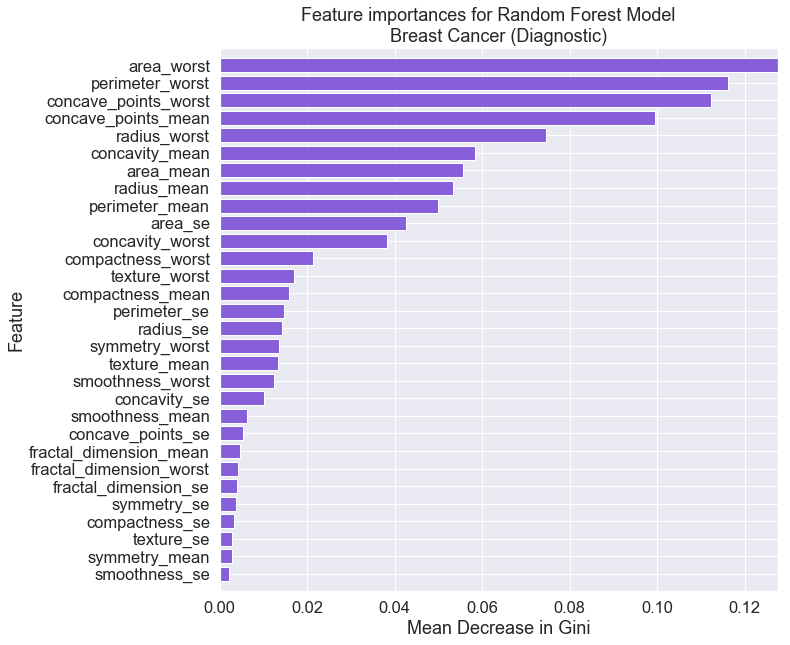

In [65]:
variable_importance_plot(importances_rf, indices_rf)

#### Cross Validation

Cross validation is a powerful tool that is used for estimating the predictive power of your model, and it performs better than the conventional training and test set. Using cross validation, we can create multiple training and test sets and average the scores to give us a less biased metric.

In this case, we will create 10 sets within our data set that calculate the estimations we have done already, then average the prediction error to give us a more accurate representation of our model's prediction power. The model's performance can vary significantly when utilizing different training and test sets.

#### K-Fold Cross Validation

Here we are employing K-fold cross validation; more specifically, 10 folds. We are creating 10 subsets of our data on which to employ the training and test set methodology; then we will average the accuracy for all folds to give us our estimation.

_Within a random forest context, if your data set is significantly large, you can choose to not do cross validation and instead use the OOB error rate as an unbiased metric for computational costs._

In [66]:
def cross_val_metrics(fit, training_set, class_set, print_results = True):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues
                  for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as
                  variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
            from cross validation score's standard deviation)
    """
    n = KFold(n_splits=10)
    scores = cross_val_score(fit,
                     training_set,
                     class_set,
                     cv = n)
    if print_results:
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
          .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [67]:
cross_val_metrics(fit_rf,
              training_set,
              class_set,
              print_results = True)

Accuracy:  0.954 (+/-  0.016)


#### Test Set Metrics

In [68]:
predictions_rf = fit_rf.predict(test_set)

In [69]:
test_crosstb = pd.crosstab(index = test_class_set,
                           columns = predictions_rf)

# More human readable
test_crosstb = test_crosstb.rename(columns= {0: 'Benign', 1: 'Malignant'})
test_crosstb.index = ['Benign', 'Malignant']
test_crosstb.columns.name = 'n = 114'

test_crosstb

n = 114,Benign,Malignant
Benign,70,1
Malignant,3,40


In [70]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.965


In [71]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0351


#### We can see, we got a very similar error rate for our test set to the one we got with our OOB, which is a good sign for our model.

#### ROC Curve Metrics

A receiver operating characteristic (ROC) curve calculates the false positive rates and true positive rates across different thresholds.

In [72]:
fpr2, tpr2, _ = roc_curve(predictions_rf,
                      test_class_set)
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]
auc_rf = auc(fpr2, tpr2)

In [75]:
def plot_roc_curve(fpr, tpr, auc, mod, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    fpr:  Array returned from sklearn.metrics.roc_curve for increasing
         false positive rates
    tpr:  Array returned from sklearn.metrics.roc_curve for increasing
         true positive rates
    auc:  Float returned from sklearn.metrics.auc (Area under Curve)
    mod:  String represenation of appropriate model, can only contain the
         following: ['knn', 'rf', 'nn']
    xlim: Set upper and lower x-limits
    ylim: Set upper and lower y-limits

    Returns:
    ----------
    Returns plot of Receiving Operating Curve for specific model. Allowing user to
    specify x and y-limits.
    """
    mod_list = ['knn', 'rf', 'nn']
    method = [('Kth Nearest Neighbor', 'deeppink'),
          ('Random Forest', 'red'),
          ('Neural Network', 'purple')]

    plot_title = ''
    color_value = ''
    for i in range(0, 3):
        if mod_list[i] == mod:
            plot_title = method[i][0]
            color_value = method[i][1]

    fig, ax = plt.subplots(figsize=(10, 10))
    #ax.set_axis_bgcolor('#fafafa')

    plt.plot(fpr, tpr,
         color=color_value,
         linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f}) \
          \nBreast Cancer Diagnostic'\
          .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

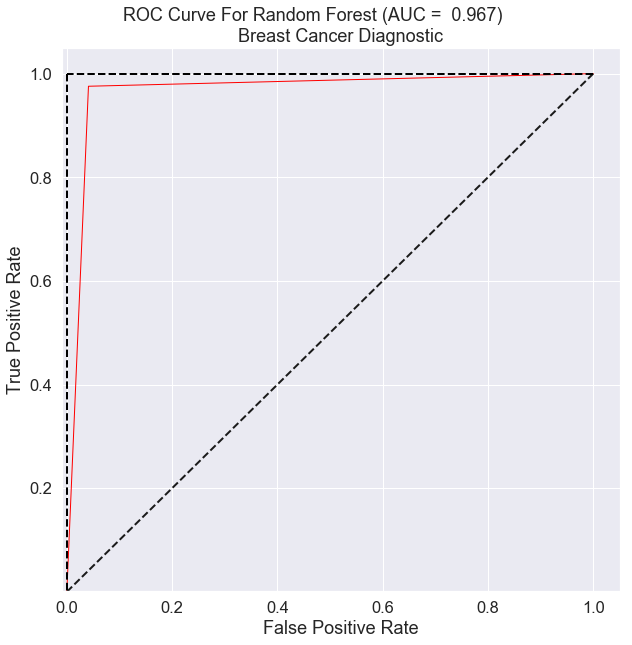

In [76]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
           xlim=(-0.01, 1.05),
           ylim=(0.001, 1.05))

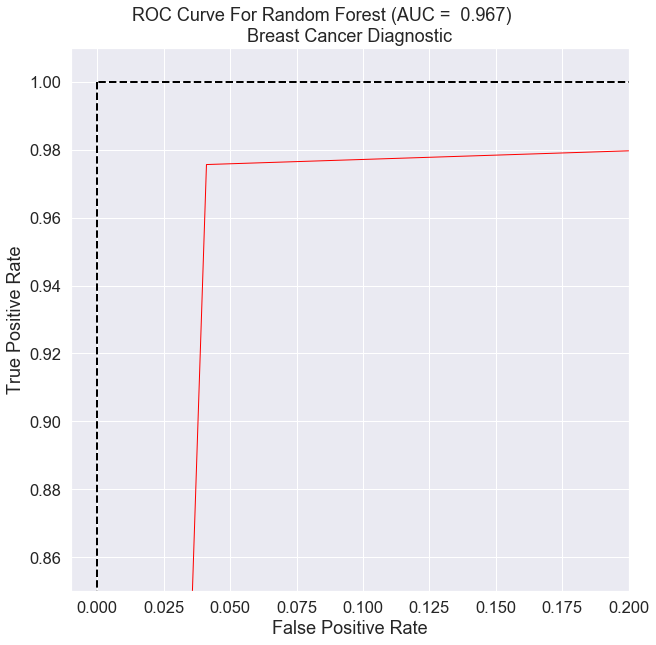

In [77]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 0.2),
               ylim=(0.85, 1.01))

#### Classification Report

In [78]:
def print_class_report(predictions, alg_name): 
    """
    Purpose
    ----------
    Function helps automate the report generated by the sklearn package. 
    Useful for multiple model comparison

    Parameters
    ----------
    Predictions:
    The predictions made by the algorithm used alg_name: 
    String containing the name of the algorithm used

    Returns:
    ----------
    Returns classification report generated from sklearn.
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions,
            test_class_set,
            target_names = dx))

In [79]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        73
   Malignant       0.93      0.98      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

